# Yoga Pose Classification 

### 1. General Statements - Willa
#### 1.1 Introduction

#### 1.2.Motivation

#### 1.3.Problem Statement

### 2.Dataset - Renhua
#### 2.1 Data Sources
#### 2.2 Data Description

### 3.Exploratory Analysis of Data - Renhua
#### 3.1 Details about the properties (numberof classes etc)

#### 3.2 Data pre-processing

#### 3.2.1 General Data Preprocessing
#### 3.2.1.1 把text文件转化成images
#### 3.2.1.2 check unavailable images 和 损坏的images并删除


#### 3.2.2 Data Preprocessing For Each Model
    3.2.2.1 CNN + MobileNetV3

    3.2.2.2 CNN + MediaPipe

    3.2.2.3 MoveNet

    3.2.2.4 Xception

    3.2.2.5 DenseNet201
  

#### 3.3 Challenging Aspects:
The Yoga-82 dataset presents several challenges:

3.3.1. **x:** 。。。。

3.3.2. **x:** 。。。

3.3.3. **x:** 。。。

3.3.4. **x:** 。。。

3.3.5. **x:** 。。。

### 4. Method Application

In this section, the models and corresponding operations will be discussed

**Model 1:** CNN + MobileNetV3

**Model 2:**

**Model 3:**

**Model 4:Xception**

**Model 5:**


#### 4.1 Method 1: CNN + MobileNetV3

##### 4.1.1 Import Necessary Libraries


In [ ]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
from PIL import Image, ImageFile

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint,TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Model
# from tensorflow.keras.layers import Rescaling, Normalization, RandomFlip, RandomRotation
from tensorflow.keras.layers.experimental import preprocessing

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("Using GPU:", tf.config.list_physical_devices('GPU')[0])
else:
    print("No GPU detected, using CPU instead.")


# System libraries
from pathlib import Path
import os.path
import requests
import sys
import os

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

Num GPUs Available:  1
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


##### 4.1.2 Create Helper Functions

In [ ]:
# Set the file URL
url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

file_path = "helper_functions.py"

# Check if the file already exists
if not os.path.exists(file_path):
    # Send a GET request to fetch the file content
    response = requests.get(url)
    
    # Write the content to the file
    with open(file_path, "wb") as file:
        file.write(response.content)
    
    print("Download complete!")
else:
    print("helper_functions.py already exists locally. Skipping download.")

# Add the current working directory to the Python path
sys.path.append(os.getcwd())

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

helper_functions.py already exists locally. Skipping download.


##### 4.1.3 Load and Transform Data

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

# Walk through each directory
dataset = "../yoga_dataset_links"
walk_through_dir(dataset)

There are 82 directories and 0 images in '../yoga_dataset_links'.
There are 0 directories and 84 images in '../yoga_dataset_links\Akarna_Dhanurasana'.
There are 0 directories and 76 images in '../yoga_dataset_links\Bharadvaja's_Twist_pose_or_Bharadvajasana_I_'.
There are 0 directories and 372 images in '../yoga_dataset_links\Boat_Pose_or_Paripurna_Navasana_'.
There are 0 directories and 260 images in '../yoga_dataset_links\Bound_Angle_Pose_or_Baddha_Konasana_'.
There are 0 directories and 216 images in '../yoga_dataset_links\Bow_Pose_or_Dhanurasana_'.
There are 0 directories and 251 images in '../yoga_dataset_links\Bridge_Pose_or_Setu_Bandha_Sarvangasana_'.
There are 0 directories and 307 images in '../yoga_dataset_links\Camel_Pose_or_Ustrasana_'.
There are 0 directories and 404 images in '../yoga_dataset_links\Cat_Cow_Pose_or_Marjaryasana_'.
There are 0 directories and 302 images in '../yoga_dataset_links\Chair_Pose_or_Utkatasana_'.
There are 0 directories and 293 images in '../yoga_d

##### 4.1.4 Placing Data into a Dataframe

In [4]:
image_dir = Path(dataset)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

image_df

Filepath  \
0      ..\yoga_dataset_links\Akarna_Dhanurasana\0_15.jpg   
1      ..\yoga_dataset_links\Akarna_Dhanurasana\0_162...   
2      ..\yoga_dataset_links\Akarna_Dhanurasana\0_18.jpg   
3      ..\yoga_dataset_links\Akarna_Dhanurasana\0_305...   
4      ..\yoga_dataset_links\Akarna_Dhanurasana\0_377...   
...                                                  ...   
37195  ..\yoga_dataset_links\viparita_virabhadrasana_...   
37196  ..\yoga_dataset_links\viparita_virabhadrasana_...   
37197  ..\yoga_dataset_links\viparita_virabhadrasana_...   
37198  ..\yoga_dataset_links\Cobra_Pose_or_Bhujangasa...   
37199  ..\yoga_dataset_links\Cobra_Pose_or_Bhujangasa...   

                                                 Label  
0                                   Akarna_Dhanurasana  
1                                   Akarna_Dhanurasana  
2                                   Akarna_Dhanurasana  
3                                   Akarna_Dhanurasana  
4                                   Akarna_Dhanurasana  
...                                                ...  
37195  viparita_virabhadrasana_or_reverse_warrior_pose  
37196  viparita_virabhadrasana_or_reverse_warrior_pose  
37197  viparita_virabhadrasana_or_reverse_warrior_pose  
37198                      Cobra_Pose_or_Bhujangasana_  
37199                      Cobra_Pose_or_Bhujangasana_  

[37200 rows x 2 columns]

##### 4.1.5 Visualizing Images from dataset

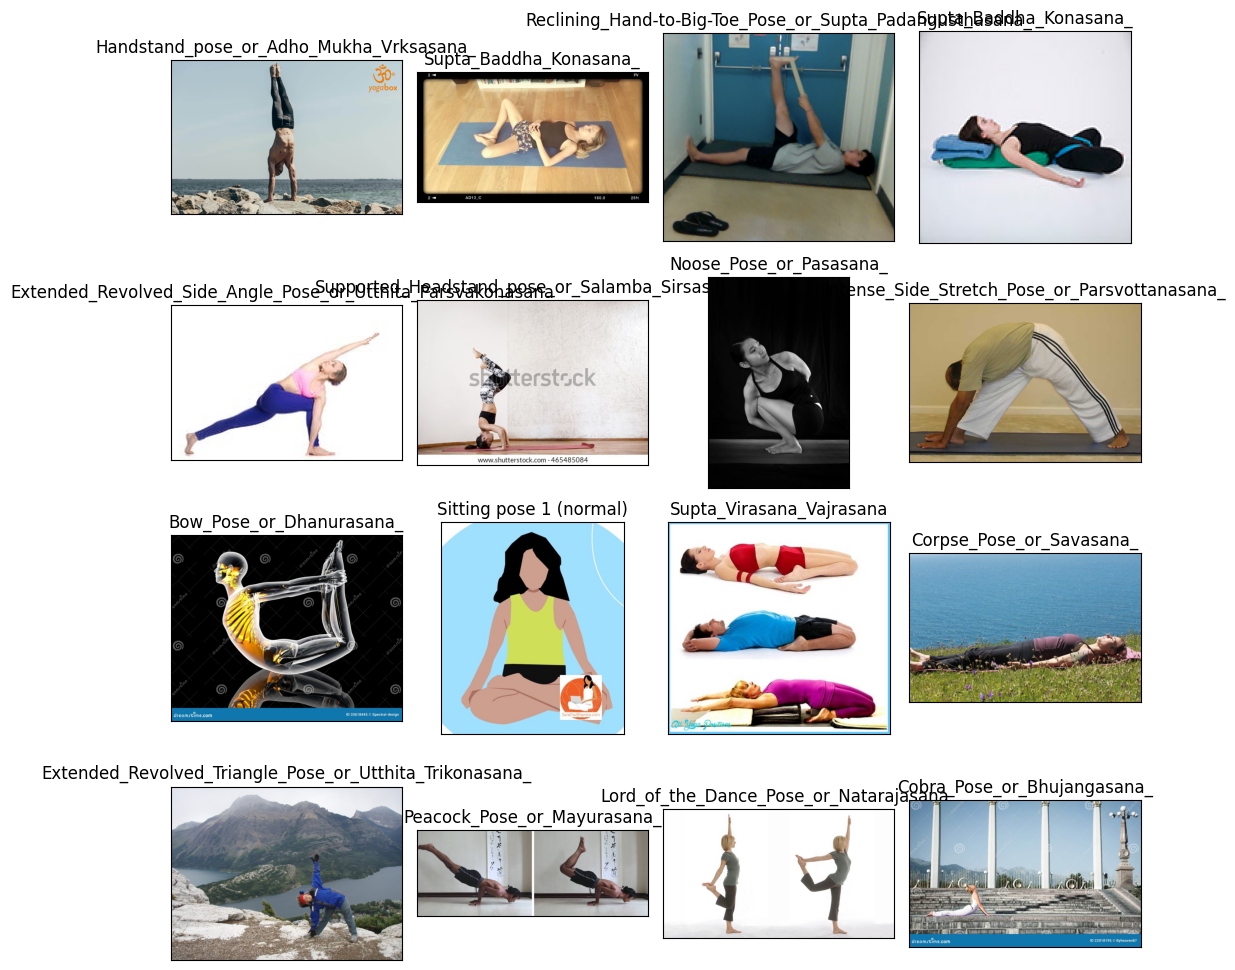

In [9]:
# Display 9 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

##### 4.1.6 Computing Error Rate Analysis

In [10]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
        
    items = list(items)
        
    p = random.choice(items)
    return p.as_posix()

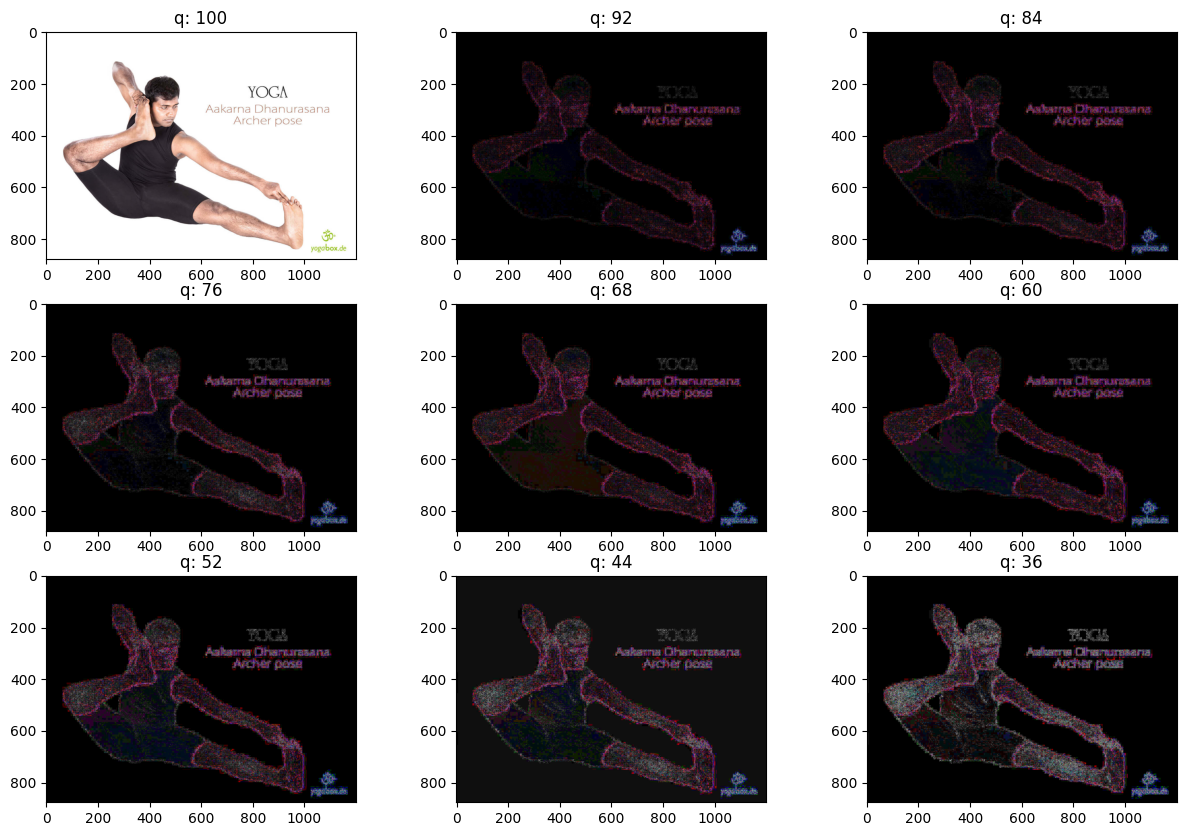

In [11]:
# View random sample from the dataset
p = random_sample('../yoga_dataset_links/Akarna_Dhanurasana')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i) 
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

##### 4.1.7 Data Preprocessing
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The dataset will be divided into three categories: Training, Validation, and Testing. The training data will be utilized to train the CNN model, while the validation data will be used to fine-tune the model's parameters. Lastly, the model's performance will be tested using the test data, which consists of unseen data that the model has not encountered during training and validating.</p>

In [ ]:
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=1)

# Load truncated image error settings
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Check and remove corrupted image files, and update the DataFrame
def check_images(dataframe, filepath_col='Filepath'):
    valid_files = []
    for filepath in dataframe[filepath_col]:
        if not os.path.exists(filepath):
            print(f"File not found, skipping: {filepath}")
            continue
        try:
            # Use the with statement to ensure the file is closed after checking
            with Image.open(filepath) as img:
                img.verify()  # Check if the image can be opened normally
            valid_files.append(filepath)  # Record valid files
        except (IOError, SyntaxError, OSError):
            print(f"Corrupted file detected and removed: {filepath}")
            try:
                os.remove(filepath)  # Delete corrupted files
            except PermissionError:
                print(f"Could not delete {filepath} as it is being used by another process.")
    
    # Update the DataFrame to keep only valid files
    return dataframe[dataframe[filepath_col].isin(valid_files)].reset_index(drop=True)

# Check and update the training and test data DataFrame
train_df = check_images(train_df)
test_df = check_images(test_df)
# Check the training and test data
check_images(train_df)
check_images(test_df)


d:\Anaconda\envs\CVNN\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Filepath  \
0     ..\yoga_dataset_links\Gate_Pose_or_Parighasana...   
1           ..\yoga_dataset_links\Split pose\2_0_20.jpg   
2     ..\yoga_dataset_links\Standing_big_toe_hold_po...   
3     ..\yoga_dataset_links\Reclining_Hand-to-Big-To...   
4     ..\yoga_dataset_links\Plow_Pose_or_Halasana_\0...   
...                                                 ...   
7435  ..\yoga_dataset_links\Bharadvaja's_Twist_pose_...   
7436  ..\yoga_dataset_links\Bow_Pose_or_Dhanurasana_...   
7437  ..\yoga_dataset_links\Supta_Virasana_Vajrasana...   
7438  ..\yoga_dataset_links\Firefly_Pose_or_Tittibha...   
7439  ..\yoga_dataset_links\Eagle_Pose_or_Garudasana...   

                                                  Label  
0                             Gate_Pose_or_Parighasana_  
1                                            Split pose  
2     Standing_big_toe_hold_pose_or_Utthita_Padangus...  
3     Reclining_Hand-to-Big-Toe_Pose_or_Supta_Padang...  
4                                Plow_Pose_or_Halasana_  
...                                                 ...  
7435       Bharadvaja's_Twist_pose_or_Bharadvajasana_I_  
7436                           Bow_Pose_or_Dhanurasana_  
7437                           Supta_Virasana_Vajrasana  
7438                      Firefly_Pose_or_Tittibhasana_  
7439                          Eagle_Pose_or_Garudasana_  

[7440 rows x 2 columns]

In [13]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [14]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

Found 23808 validated image filenames belonging to 82 classes.
Found 5952 validated image filenames belonging to 82 classes.
Found 7440 validated image filenames belonging to 82 classes.


In [15]:
# Resize Layer
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal_and_vertical"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),                       
], name="data_augmentation")

##### 4.1.8 Training setting
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The input images will be processed using a pre-trained CNN model, MobileNetV3. To monitor the training process effectively, three callbacks will be implemented: Model Checkpoint, Early Stopping, and TensorBoard. The detailed summary of the model's hyperparameters is provided below:</p>

**Batch size** : 64

**Epochs** : 100

**Input Shape** : (224, 224, 3)

**Output layer** : 82



In [21]:
# Load the pretained model
pretrained_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# pretrained_model.trainable = False

pretrained_model.trainable = True
for layer in pretrained_model.layers[:100]: 
    layer.trainable = False

12683000/12683000 [==============================] - 1s 0us/step


In [22]:
# Create checkpoint callback
checkpoint_path = "yoga_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)


In [23]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3,
                                                  restore_best_weights=True) # if val loss decreases for 3 epochs in a row, stop training

##### 4.1.9 Train the model

In [ ]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("Using GPU:", tf.config.list_physical_devices('GPU')[0])
else:
    print("No GPU detected, using CPU instead.")


inputs = pretrained_model.input
x = resize_and_rescale(inputs)
x = data_augmentation(x)


x = pretrained_model(x, training=True)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)



outputs = Dense(82, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", 
                                    "yoga_classification"),
        checkpoint_callback,
    ]
)

Num GPUs Available:  1
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Saving TensorBoard log files to: training_logs/yoga_classification/20241112-185847


C:\Users\Anderson\.conda\envs\COMP9444proj\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/100
103/372 [=======>......................] - ETA: 1:21 - loss: 4.3895 - accuracy: 0.0288

C:\Users\Anderson\.conda\envs\COMP9444proj\lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


372/372 [==============================] - 146s 373ms/step - loss: 4.3288 - accuracy: 0.0366 - val_loss: 4.2310 - val_accuracy: 0.0521
Epoch 2/100
372/372 [==============================] - 135s 363ms/step - loss: 4.1874 - accuracy: 0.0604 - val_loss: 3.9854 - val_accuracy: 0.1005
Epoch 3/100
372/372 [==============================] - 134s 359ms/step - loss: 3.9492 - accuracy: 0.0964 - val_loss: 3.6669 - val_accuracy: 0.1603
Epoch 4/100
372/372 [==============================] - 134s 360ms/step - loss: 3.6807 - accuracy: 0.1403 - val_loss: 3.3751 - val_accuracy: 0.2004
Epoch 5/100
372/372 [==============================] - 134s 359ms/step - loss: 3.4677 - accuracy: 0.1793 - val_loss: 3.1730 - val_accuracy: 0.2455
Epoch 6/100
372/372 [==============================] - 135s 363ms/step - loss: 3.2824 - accuracy: 0.2137 - val_loss: 2.9764 - val_accuracy: 0.2799
Epoch 7/100
372/372 [==============================] - 134s 360ms/step - loss: 3.1051 - accuracy: 0.2463 - val_loss: 2.8324 - val_

#### 4.2 Method 2: CNN + MediaPipe

#### 4.3 Method 3: MoveNet

#### 4.4 Method 4: Xception

#### 4.4 Method 4: Xception

##### 4.4.1 Import Necessary Libraries
At first, the code imports many deep learning libraries. It uses TensorFlow and Keras as main framework, and also imports some helpful libraries like numpy for calculation and matplotlib for making pictures. These libraries are very important for our deep learning project.

In [ ]:
# Model imports
import os
import keras
import numpy as np
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import load_model
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler

#####  4.4.2 Data and Model Setup
Then, we prepare data using ImageDataGenerator. This part is very clever because it can make our training pictures more different by doing things like rotating and flipping. After that, we load training and validation data from folders. We also make a function called lr_schedule to control learning rate - this is important for good training. The build_model function is using Xception model, which is very good at understanding pictures. The train_model function does training in two parts - first part only trains some layers, second part trains everything. This is good way for transfer learning.

In [ ]:
# Data Generator setup - with augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2,
    rescale=1. / 255
)

# Load data
root_path = r'C:\Users\Anderson\Documents\GitHub\COMP9444_project\Dataset\Yoga-82\yoga_dataset_links_skeleton'  # Update with your path
train_ds = data_gen.flow_from_directory(
    root_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

valid_ds = data_gen.flow_from_directory(
    root_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Get number of classes
n_classes = len(train_ds.class_indices)


def lr_schedule(epoch):
    initial_lr = 0.001

    if epoch < 5:
        return initial_lr
    elif epoch < 15:
        return initial_lr * 0.5
    elif epoch < 30:
        return initial_lr * 0.1
    elif epoch < 50:
        return initial_lr * 0.05
    elif epoch < 70:
        return initial_lr * 0.01
    else:
        return initial_lr * 0.005


def build_model(trainable=False, learning_rate=0.001):
    base_model = Xception(
        include_top=False,
        weights='imagenet',
        input_shape=(256, 256, 3)
    )

    base_model.trainable = trainable

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


def train_model():
    # stage1
    print("Stage 1: Training top layers...")
    model = build_model(trainable=False, learning_rate=0.001)

    callbacks_stage1 = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=10,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            'yoga_pose_model_stage1.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )
    ]

    history1 = model.fit(
        train_ds,
        epochs=30,
        validation_data=valid_ds,
        callbacks=callbacks_stage1
    )

    # stage2
    print("\nStage 2: Fine-tuning the entire model...")
    model = build_model(trainable=True, learning_rate=0.0001)

    for layer in model.layers[0].layers[:-20]:
        layer.trainable = False

    callbacks_stage2 = [
        EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            'yoga_pose_model_stage2.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=7,
            min_lr=1e-7,
            verbose=1
        ),
        LearningRateScheduler(lr_schedule, verbose=1)
    ]

    history2 = model.fit(
        train_ds,
        epochs=70,
        validation_data=valid_ds,
        callbacks=callbacks_stage2
    )

    return model, history1, history2


Found 13145 images belonging to 82 classes.
Found 3250 images belonging to 82 classes.


#### 4.4.3 Visualization and Evaluation
Next part is about showing results. The plot_training_history function makes nice graphs to show how well model is learning. We can see accuracy and loss changing over time. The evaluate_model function checks how good our model is with test data. These functions help us understand if our model is working well.

In [ ]:

def plot_training_history(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.axvline(x=len(history1.history['accuracy']), color='g', linestyle='--', label='Stage Change')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.axvline(x=len(history1.history['loss']), color='g', linestyle='--', label='Stage Change')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


def evaluate_model(model, test_ds):
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")

    return test_loss, test_accuracy


Starting training process...
Number of classes: 82


#### 4.4.4 Main Execution
Final part puts everything together. It starts training, makes pictures of results, checks how good model is, and saves model for later use. It also prints important numbers like how many times it trained and how accurate it is. This part shows if our hard work was successful.
All these parts work together to make a model that can recognize different yoga poses from pictures. The code uses many good techniques from deep learning field, like transfer learning and data augmentation. This makes the model learn better and work better with new pictures it hasn't seen before.

Stage 1: Training top layers...
Epoch 1/30
411/411 [==============================] - ETA: 0s - loss: 3.8761 - accuracy: 0.1092
Epoch 1: val_accuracy improved from -inf to 0.23569, saving model to yoga_pose_model_stage1.h5
411/411 [==============================] - 225s 537ms/step - loss: 3.8761 - accuracy: 0.1092 - val_loss: 3.2156 - val_accuracy: 0.2357 - lr: 0.0010
Epoch 2/30
411/411 [==============================] - ETA: 0s - loss: 3.2308 - accuracy: 0.2096
Epoch 2: val_accuracy improved from 0.23569 to 0.28892, saving model to yoga_pose_model_stage1.h5
411/411 [==============================] - 298s 725ms/step - loss: 3.2308 - accuracy: 0.2096 - val_loss: 2.8166 - val_accuracy: 0.2889 - lr: 0.0010
Epoch 3/30
411/411 [==============================] - ETA: 0s - loss: 3.0041 - accuracy: 0.2483
Epoch 3: val_accuracy improved from 0.28892 to 0.33169, saving model to yoga_pose_model_stage1.h5
411/411 [==============================] - 260s 632ms/step - loss: 3.0041 - accuracy: 0.2483 

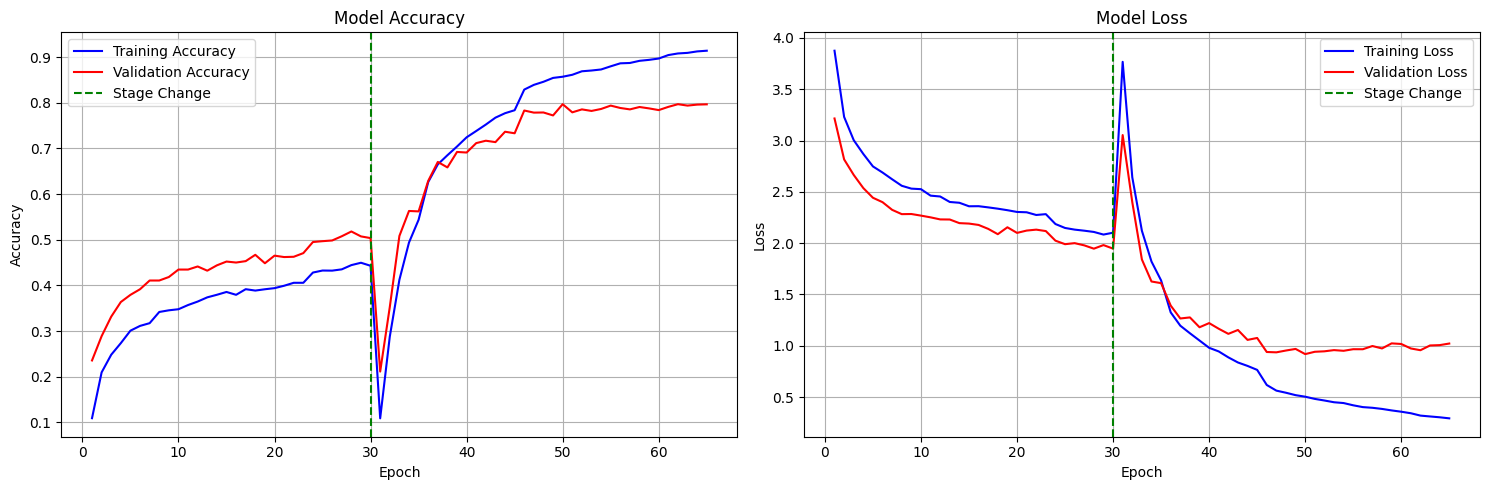


Evaluating model...
102/102 [==============================] - 29s 279ms/step - loss: 0.9474 - accuracy: 0.7843
Test Accuracy: 78.43%
Test Loss: 0.9474

Model saved to yoga_pose_model_final.h5

Training Summary:
Total epochs trained: 65
Best validation accuracy: 79.69%
Final validation accuracy: 78.43%


In [ ]:
if __name__ == "__main__":
    print("Starting training process...")
    print(f"Number of classes: {n_classes}")

    model, history1, history2 = train_model()

    plot_training_history(history1, history2)

    final_loss, final_accuracy = evaluate_model(model, valid_ds)

    model_save_path = 'yoga_pose_model_final.h5'
    model.save(model_save_path)
    print(f"\nModel saved to {model_save_path}")

    print("\nTraining Summary:")
    print(f"Total epochs trained: {len(history1.history['accuracy']) + len(history2.history['accuracy'])}")
    print(
        f"Best validation accuracy: {max(history1.history['val_accuracy'] + history2.history['val_accuracy']) * 100:.2f}%")
    print(f"Final validation accuracy: {final_accuracy * 100:.2f}%")

#### 4.5 Method 5: DenseNet201

#### 5. Results - Klaus


##### 5.1 Load model and run test dataset

##### Model 1: CNN + MobileNetV3

In [17]:
# Load the model
model1 = tf.keras.models.load_model("yoga_classification_complete_model.h5")
print("load complete")

load complete


In [18]:
results = model1.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

d:\Anaconda\envs\CVNN\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
d:\Anaconda\envs\CVNN\lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


    Test Loss: 1.12678
Test Accuracy: 72.66%


##### Model 2: ...

##### Model 3: ...

##### Model 4: Xception

In [ ]:
# Load model
model = tf.keras.models.load_model("yoga_pose_model_final.h5")  # Update with your model path
print("Model loaded successfully")

Model loaded successfully


##### Model 5: ...

##### 5.2 Visualizing loss curves

Loss curves are used to visualize the model's learning progress during training by plotting the training and validation loss over epochs. They help identify underfitting, overfitting, or convergence issues, providing insights to adjust hyperparameters or the training process.

##### Model 1: CNN + MobileNetV3

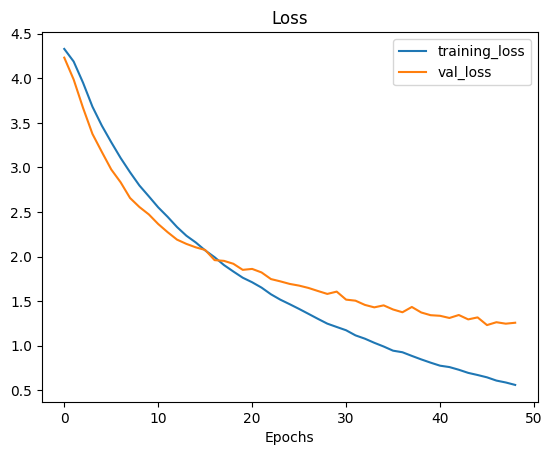

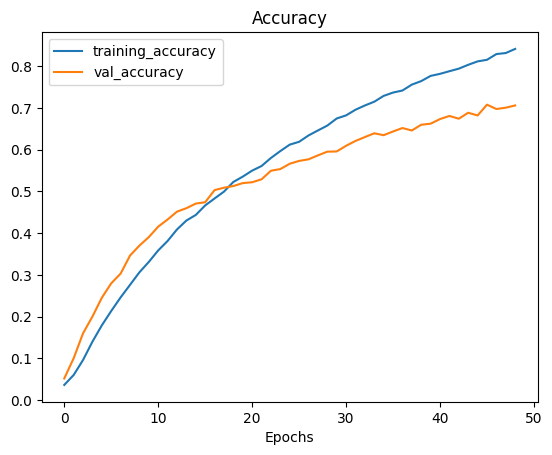

In [26]:
plot_loss_curves(history)

##### Model 2: ...

##### Model 3: ...

##### Model 4: Xception

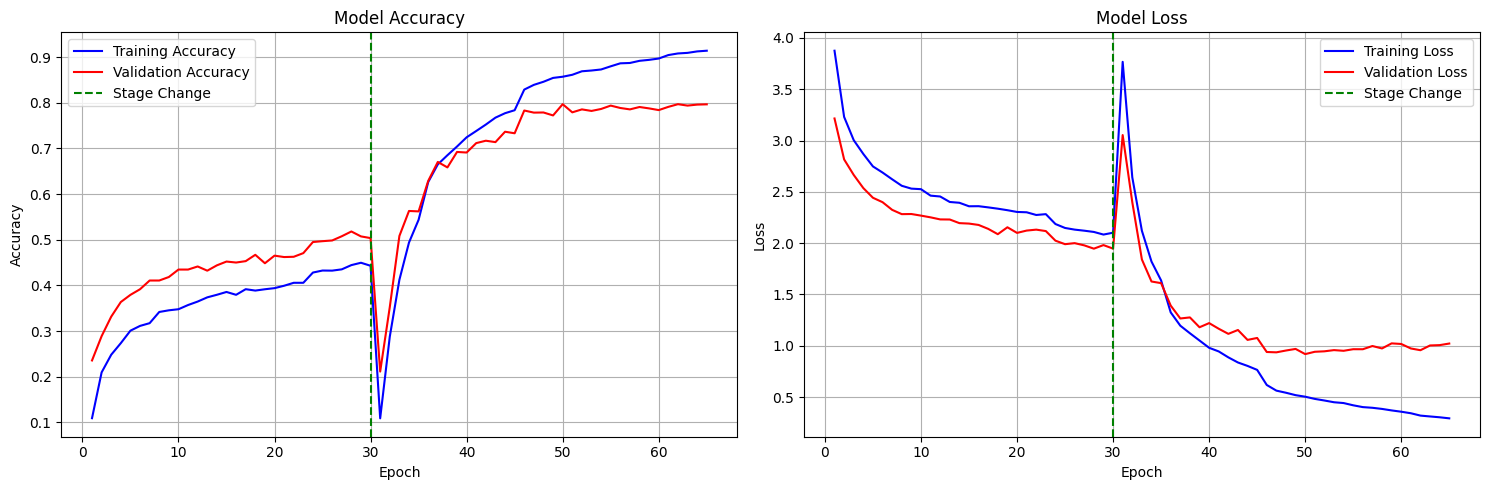

In [ ]:
def plot_training_curves():
    # Loss
    plt.figure(figsize=(8, 6))
    plt.plot(history['loss'], label='training_loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(history['accuracy'], label='training_accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

try:
    history = np.load('training_history.npy', allow_pickle=True).item()
    plot_training_curves()
except:
    print("Training history file not found")

##### Model 5: ...

##### 5.3 Making predictions on the test data

In [20]:
# Predict the label of the test_images
pred = model1.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['Gate_Pose_or_Parighasana_', 'Split pose', 'Standing_big_toe_hold_pose_or_Utthita_Padangusthasana', 'Legs-Up-the-Wall_Pose_or_Viparita_Karani_', 'Plow_Pose_or_Halasana_']


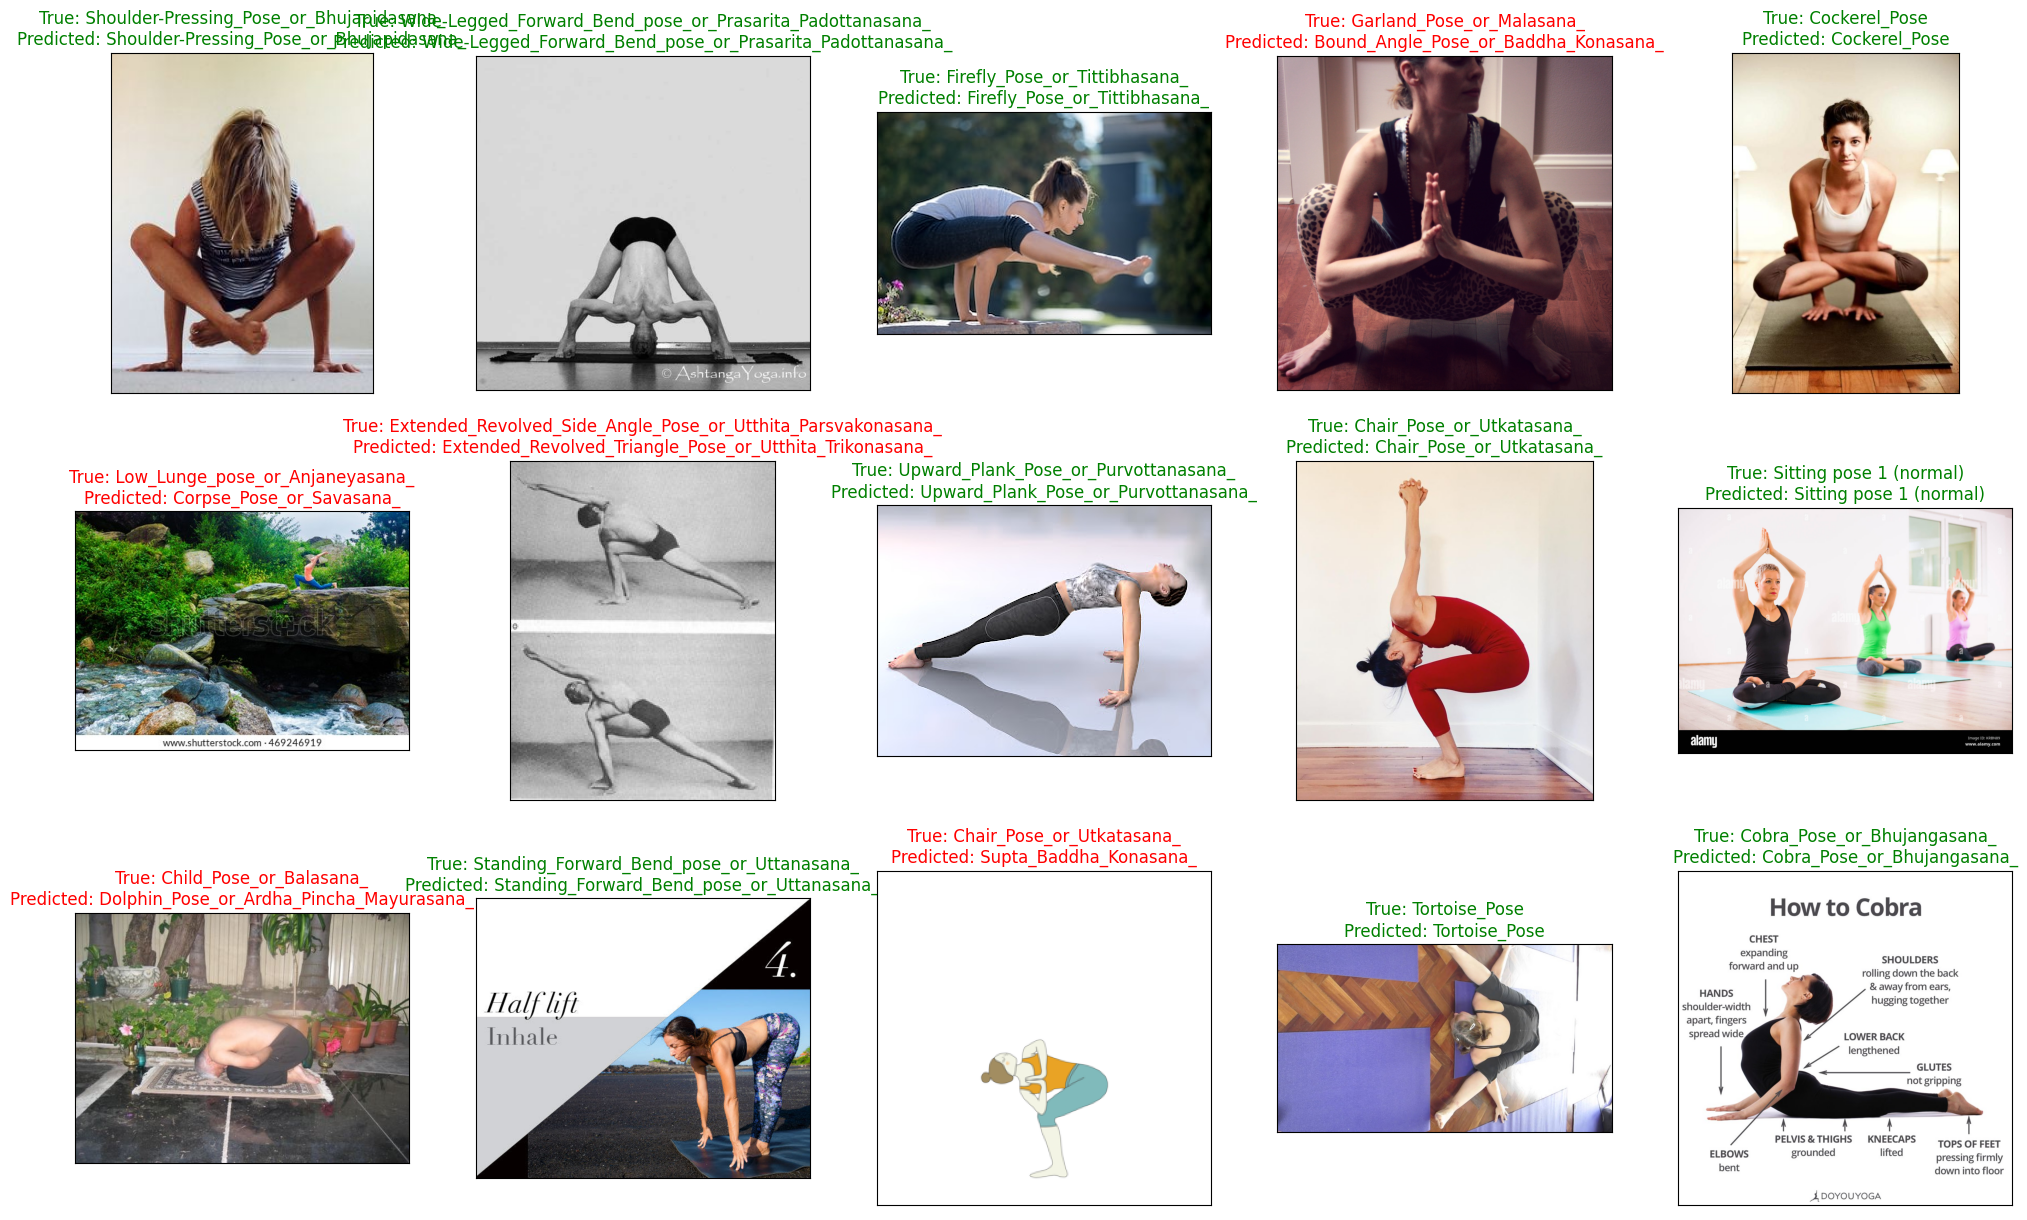

<Figure size 640x480 with 0 Axes>

In [28]:
  # Display 15 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

##### 5.3 Plotting the classification reports and confusion matrix

A confusion matrix is a tabular representation of a model's classification performance, showing the counts of true positives, true negatives, false positives, and false negatives. It provides a detailed breakdown of prediction accuracy for each class, aiding in the identification of misclassification patterns.

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The test dataset will be used to assess the model's performance. Accuracy is a key metric which measures the proportion of correct predictions made by the model. Additional evaluation metrics include the following:   </p>

<h3>Precision(P):</h3> 
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Precision represents the proportion of true positive predictions (TP) out of all relevant results, including false positives (FP). In multi-class classification tasks, precision is averaged across all classes.</p>

<h4> <center>$P=TP/(TP+FP)$</center></h4> 

<h3>Recall(R): </h3> 
<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Recall indicates the proportion of true positives (TP) out of the total true positives and false negatives (FN). For multi-class problems, recall is also averaged across classes.</p>
<h4><center>$R=TP/(TP+FN)$</center></h4>

<h3>F1 score(F1): </h3>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">The F1 score is the harmonic mean of precision and recall, providing a balanced measure of the two metrics. For multi-class classification, the F1 score is averaged across all classes.</p>
<h4><center>$F1=2 * (TP * FP)/(TP+FP)$</center></h4>

##### Model 1: CNN + MobileNetV3

In [29]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana       0.57      0.69      0.63        39
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_       0.70      0.19      0.30        36
                                         Boat_Pose_or_Paripurna_Navasana_       0.74      0.75      0.75       161
                                     Bound_Angle_Pose_or_Baddha_Konasana_       0.71      0.58      0.64        91
                                                 Bow_Pose_or_Dhanurasana_       0.71      0.83      0.76        81
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_       0.83      0.72      0.77       103
                                                 Camel_Pose_or_Ustrasana_       0.76      0.84      0.80       129
                                            Cat_Cow_Pose_or_Marjaryasana_      

precision    recall  \
Akarna_Dhanurasana                                0.574468  0.692308   
Bharadvaja's_Twist_pose_or_Bharadvajasana_I_      0.700000  0.194444   
Boat_Pose_or_Paripurna_Navasana_                  0.742331  0.751553   
Bound_Angle_Pose_or_Baddha_Konasana_              0.706667  0.582418   
Bow_Pose_or_Dhanurasana_                          0.705263  0.827160   
...                                                    ...       ...   
Yogic_sleep_pose                                  0.611111  0.333333   
viparita_virabhadrasana_or_reverse_warrior_pose   0.607143  0.485714   
accuracy                                          0.707392  0.707392   
macro avg                                         0.698809  0.666294   
weighted avg                                      0.713117  0.707392   

                                                 f1-score      support  
Akarna_Dhanurasana                               0.627907    39.000000  
Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.304348    36.000000  
Boat_Pose_or_Paripurna_Navasana_                 0.746914   161.000000  
Bound_Angle_Pose_or_Baddha_Konasana_             0.638554    91.000000  
Bow_Pose_or_Dhanurasana_                         0.761364    81.000000  
...                                                   ...          ...  
Yogic_sleep_pose                                 0.431373    33.000000  
viparita_virabhadrasana_or_reverse_warrior_pose  0.539683    35.000000  
accuracy                                         0.707392     0.707392  
macro avg                                        0.673781  7440.000000  
weighted avg                                     0.704851  7440.000000  

[85 rows x 4 columns]

##### Model 2: ...

##### Model 3: ...

##### Model 4: Xception

In [ ]:
def print_classification_report(report):
    print("\nClassification Report:")
    print(" " * 75 + "precision    recall  f1-score   support")
    print()
    

    for line in report.split('\n'):
        if not line.strip():  
            continue
            
        if line.lstrip().startswith('accuracy'):
            name = 'accuracy'
            line = line[8:] 
            print(" " * 75 + name + line)
        elif line.lstrip().startswith('macro'):
            name = 'macro avg'
            line = line[21:]  
            print(" " * 75 + name + line)
        elif line.lstrip().startswith('weighted'):
            name = 'weighted avg'
            line = line[21:]  
            print(" " * 75 + name + line)
        elif not line.startswith(' ' * 10):  
            try:
                items = line.split()
                if len(items) >= 5:  
                    metrics = items[-4:]  
                    name = " ".join(items[:-4])  
                    metrics_str = "{:>9} {:>9} {:>9} {:>9}".format(*metrics)
                    print(f"{name:>75} {metrics_str}")
            except Exception as e:


Classification Report:
                                                                           precision    recall  f1-score   support

  Pose_Dedicated_to_the_Sage_Koundinya_or_Eka_Pada_Koundinyanasana_I_and_II      0.61      0.83      0.70        24
          Upward_Facing_Two-Foot_Staff_Pose_or_Dwi_Pada_Viparita_Dandasana_      0.82      0.75      0.78        12
                                                                           accuracy                                                         accuracy                           0.78      3250
                                                                           macro avg                                           macro avg       0.77      0.74      0.75      3250
                                                                           weighted avg                                        weighted avg       0.79      0.78      0.78      3250


##### Model 5: ...

##### 5.4 Grad-Cam Visualization

Grad-CAM (Gradient-weighted Class Activation Mapping) generates a heatmap to highlight the regions in an image that the model focused on to make a decision. It is a powerful tool for model interpretability, allowing visualization of which parts of an image contribute most to a specific prediction. 

<br>

Working Principle of Grad-CAM

1. **Input Image**: An input image is passed through a trained CNN.


2. **Gradient Calculation**: Grad-CAM computes the gradient of the predicted class score with respect to the feature maps of the last convolutional layer. This highlights which spatial features contribute most to the prediction.


3. **Weighted Feature Maps**:

    3.1 The gradients are averaged (pooled) spatially to obtain a weight for each feature map channel.

    3.2 These weights reflect the importance of each feature map in predicting the target class.



4. **Heatmap Generation**:

    4.1 The weighted combination of the feature maps is calculated.

    4.2 This result is passed through a ReLU function to keep only positive contributions, producing a coarse heatmap.


5. **Overlaying the Heatmap**:

    5.1 The heatmap is resized to match the input image dimensions and overlaid on the image, showing the regions the model considered important.

<br>

We implement this map since The Grad-CAM helps us to

1. allowing researchers to understand the **key areas** that the model focuses on;

2. Discover whether the model has **bias**, such as focusing on areas that are not related to classification;

3. also allowing users to **more intuitively see** how the model "sees" the image




##### Model 1: CNN + MobileNetV3

C:\Users\klaus\AppData\Local\Temp\ipykernel_14048\892203968.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


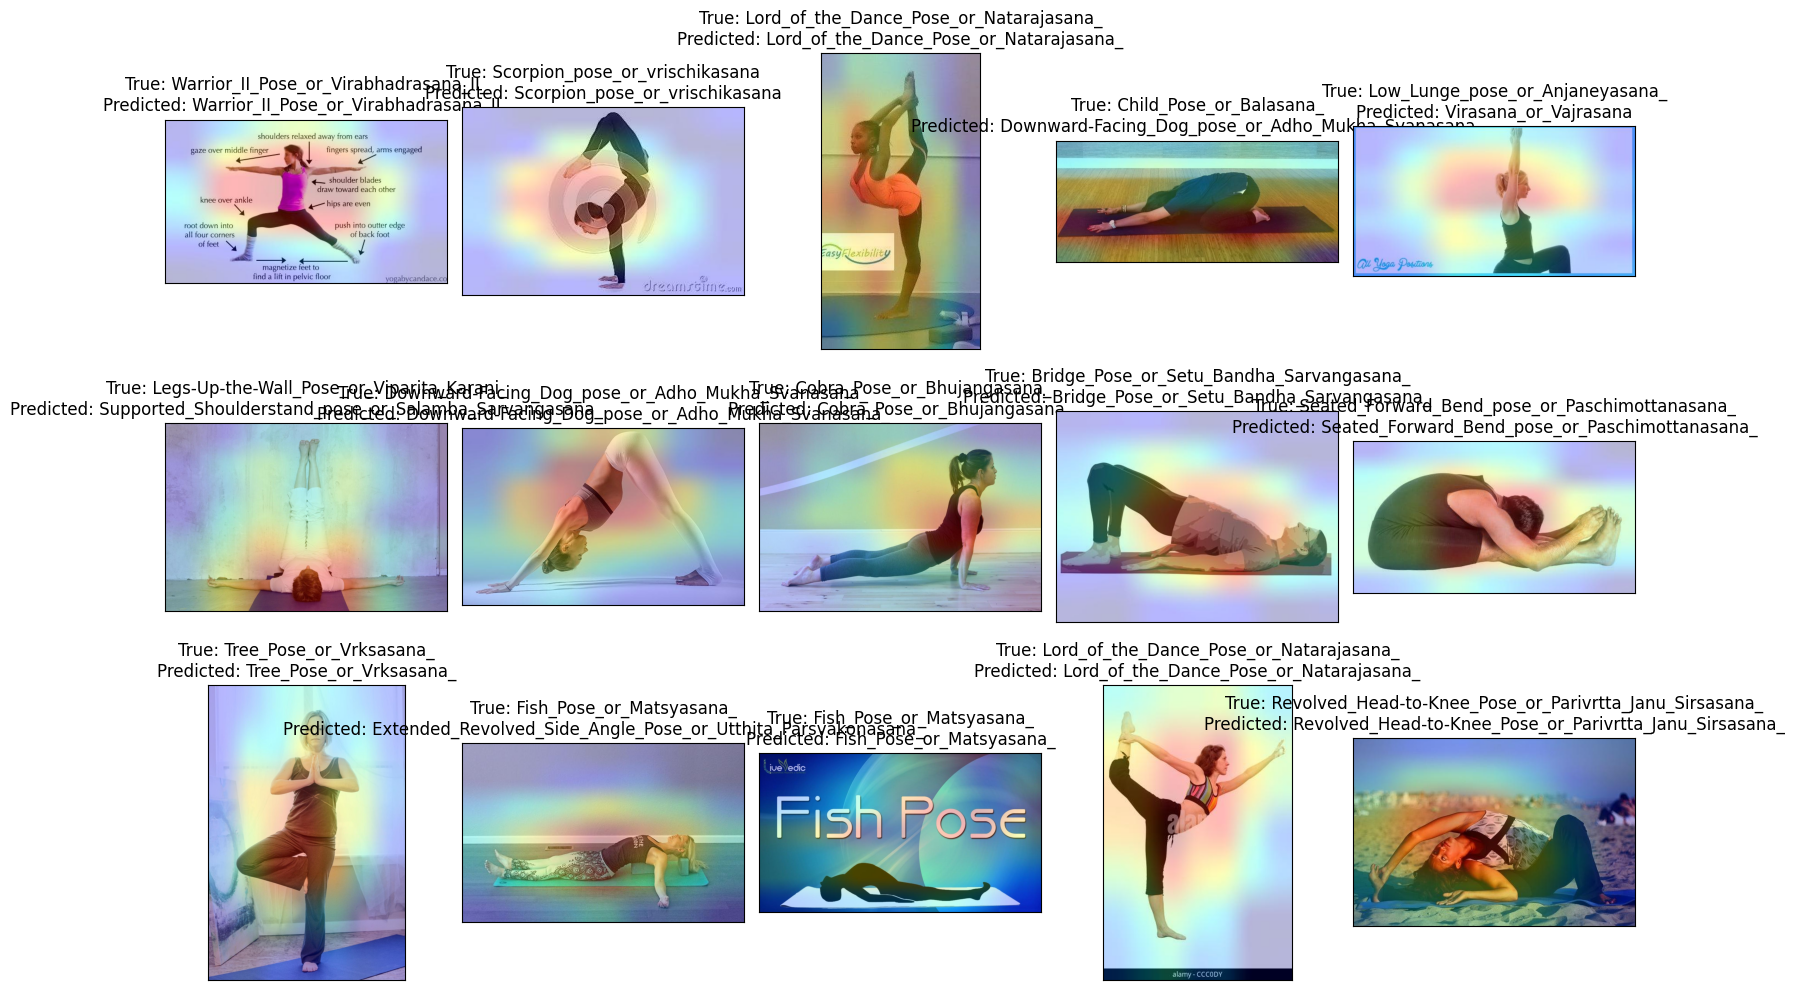

In [23]:
def get_img_array(img_path, size=(224, 224)):
    # Load the image and resize it
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # Add a dimension to convert the image into batch size
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last convolutional layer and the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the input image
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]
    
    # Compute the gradient of the class channel with respect to the feature map of the last convolutional layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Get the average value of gradients for each feature channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Generate the heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Scale the heatmap to the range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use the jet colormap to colorize the heatmap
    jet = cm.get_cmap("jet")

    # Get RGB values
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Convert the colored heatmap to an image
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Overlay the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    
    # Save and return the overlaid image
    superimposed_img.save(cam_path)
    return cam_path

# Configure preprocessing for the model
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

# Set the name of the last convolutional layer and image size
last_conv_layer_name = "Conv_1"  # Update with the actual last convolutional layer name
img_size = (224, 224)

# Remove the softmax from the last layer
model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=True)
model.layers[-1].activation = None

# Randomly select images from the test dataset and generate Grad-CAM
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})
random_index = random.sample(range(len(test_df)), 15)  # Assume test_df is your test dataset DataFrame

for i, ax in enumerate(axes.flat):
    img_path = test_df.Filepath.iloc[random_index[i]]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}")

plt.tight_layout()
plt.show()

##### Model 2: ...

##### Model 3: ...

##### Model 4: Xception

##### 5.5 Accuracy comparison between models

Among all 5 models in our group, MoveNet got highest test accuracy which is 88.22 while CNN + MobileNetV3 got the lowest test accuracy which is 72.67, the ranking of these models' accuracy is :

    1.  MoveNet - 88.22

    2. Xception - 79.63

    3. DenseNet201 - 79.00

    4. 3D CNN + MediaPipe - 77.29

    5. CNN + MobileNetV3 - 72.67


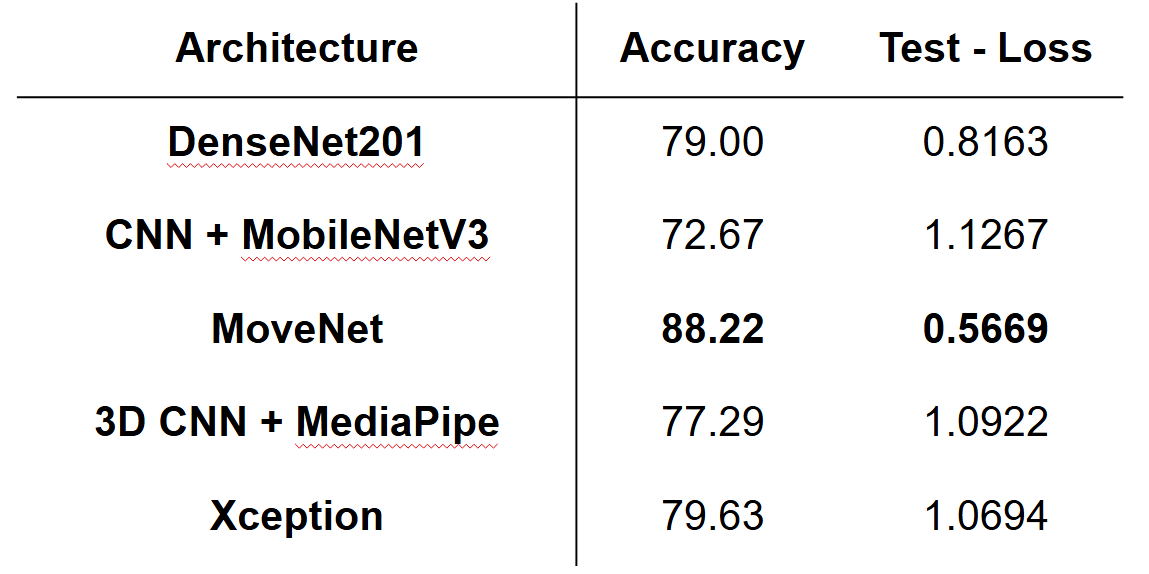

In [9]:
import base64
from IPython.display import HTML, display

# Function to encode an image as Base64
def embed_image_base64(image_path):
    # Read the image in binary mode
    with open(image_path, "rb") as image_file:
        # Encode the image to Base64
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    # Create an HTML string to display the image
    html_code = f'<img src="data:image/jpeg;base64,{encoded_string}" width="900"/>'
    return html_code

# Path to your image
image_path = "accuracy_comparison.png"  # Replace with your image path

# Embed and display the image
html_code = embed_image_base64(image_path)
display(HTML(html_code))

##### 5.6 The three classes with the highest precision in each model

In this page, we will take a look at the best 3 prediction classes in each model.
We can see whatever the model we chose, we always have some common classes that have high accuracy

1. the highest precision of common class belongs to **Extended Puppy Pose**, it got **100 percent** in both **MoveNet** and **Xception**

2. The second one is the **Yogic sleep pose** which has **100 percent** precision in both **DenseNet201** and **MoveNet**

3. The next one goes to the **Extended Revolved Triangle**, it got **94 percent** in **CNN + MobileNetV3** and **97 Percent** in **Xception**

4. The last one is the **Warriror two pose** which got **98 percent** in **DenseNet201** and **94 percent** in **CNN + MobileNetV3**



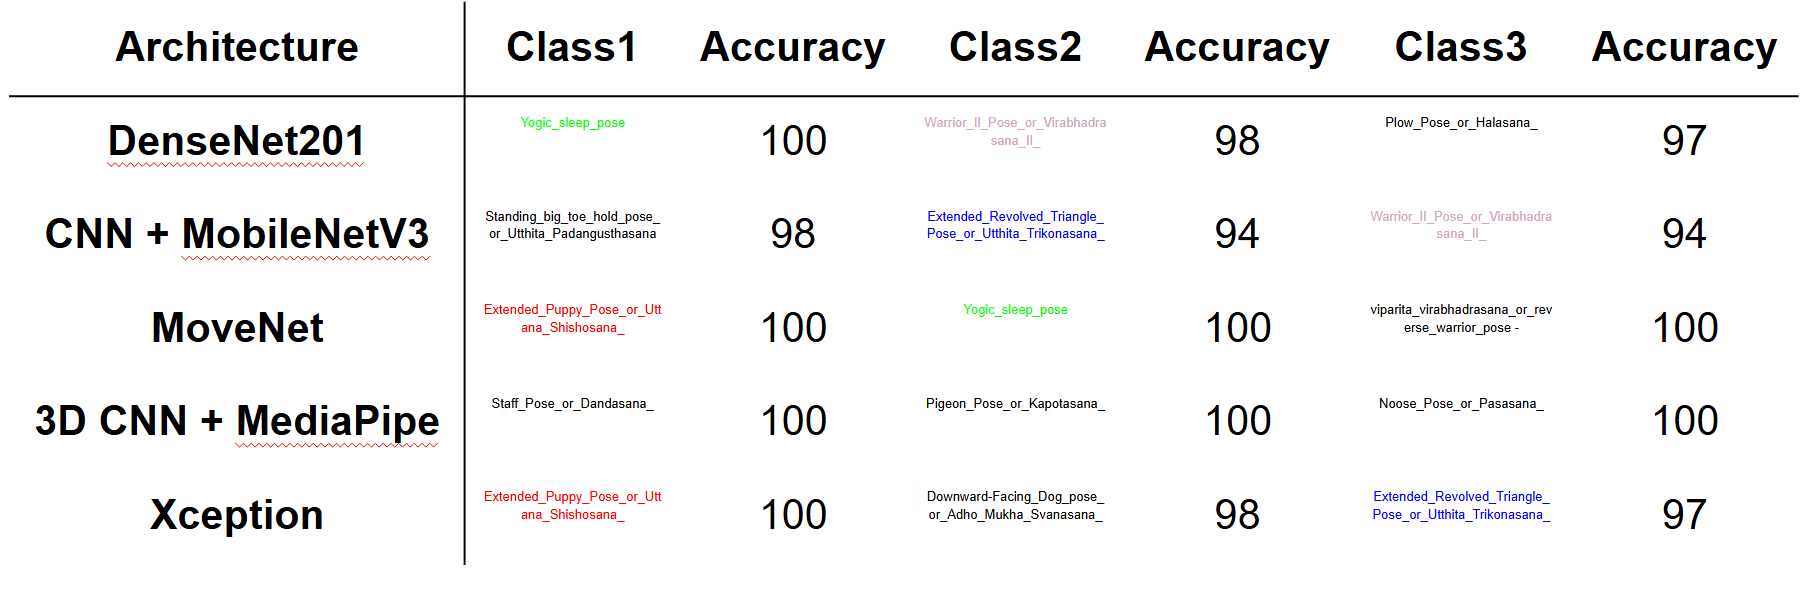

In [11]:
# Function to encode an image as Base64
def embed_image_base64(image_path):
    # Read the image in binary mode
    with open(image_path, "rb") as image_file:
        # Encode the image to Base64
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    # Create an HTML string to display the image
    html_code = f'<img src="data:image/jpeg;base64,{encoded_string}" width="2000"/>'
    return html_code

# Path to your image
image_path = "3best_classes.png"  # Replace with your image path

# Embed and display the image
html_code = embed_image_base64(image_path)
display(HTML(html_code))

#### 6. Evaluation - Klaus， ZhaoYi

以下都是抄的别的组的 要全部改动

##### 6.1 Evaluation Methods

##### 6.1 Loss and Accuracy



These charts illustrate the training and validation loss and accuracy over epochs for different models.
1. EfficientNetB0Modified shows a noticeable improvement in validation performance compared to the original version, indicating enhanced generalization capability.
2. EfficientNetV2M performs well overall, with low validation loss and high accuracy, demonstrating effective training.
3. DenseNet169 and DenseNet201 exhibit stable performance on both training and validation sets, though they show some fluctuations in the middle epochs, suggesting potential needs for further hyperparameter tuning.
4. MobileNetV2 displays a good trend in both training and validation loss and accuracy, with slight fluctuations in validation loss but generally good performance.
In summary, EfficientNetB0Modified and EfficientNetV2M demonstrate better generalization capabilities and lower validation loss, making them preferable choices for selection. The other models also perform well but may require further adjustments to optimize their validation performance.

##### 6.2 Performance Analysis


EfficientNetB0-Original and EfficientNetB0-Modified performed quite well, demonstrating good accuracy and stability. EfficientNetV2M excelled in Top-5 accuracy, making it suitable for scenarios requiring consideration of multiple prediction outcomes. The DenseNet series showed some fluctuations in certain categories but remained strong overall. While MobileNetV2 was somewhat less performant, it still has unique advantages when applied to mobile devices. Overall, the EfficientNet series is the better choice, particularly with the enhanced generalization capability of EfficientNetB0Modified.

##### 6.3 confusion matrix


Confusion matrices can illustrate the performance of classification models, especially in terms of classification errors between different categories.


1. DenseNet169 and DenseNet201: Both models perform well in many categories but show some confusion in certain categories, requiring further adjustment and optimization.
2. EfficientNetB0Modified and EfficientNetB0Original: The EfficientNetB0Modified outperforms the original version, indicating an improvement in the generalization capability of the modified model.
3. EfficientNetV2M: It performs very well in Top-5 accuracy, making it suitable for scenarios that require consideration of multiple prediction outcomes.
4. MobileNetV2: Although the accuracy is slightly lower, it has unique advantages when applied to mobile devices, making it suitable for resource-constrained environments.
Overall, EfficientNetB0Modified is the best-performing model, followed by EfficientNetV2M and the DenseNet series.


#### 7. Discussion - ZhaoYi

#### 8. Conclusion - ZhaoYi

#### 9. Future Work - ZhaoYi

#### 10. References

1. CNN + MobileNetV3 model: https://www.kaggle.com/code/vencerlanz09/yoga-pose-classification-using-cnn-mobilenetv3/notebook


